# <center>KPIs
## <center> - Clave de Desempeño -

Es un <b>indicador de desempeño</b>, respecto de un <b>objetivo</b> propuesto por una organización, para medir dicho desempeño se utilizan medidas numéricas denominadas <b>métricas</b>, en relación con los objetivos preestablecidos. Los KPI son utilizados para medir el progreso y el éxito en áreas clave como ventas, productividad, rentabilidad, eficiencia y satisfacción del cliente.


## KPI I

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico.
Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

___________________________

### <center>Importar Librerias</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("ignore")

__________________

### <center>Extracción de datos</center>

In [2]:
#Se pasa dirección del archivo
archivo = os.path.join('..', 'CSV', 'siniestros_t.csv')

#Se extraen archivo 
df_siniestros = pd.read_csv(archivo)

In [3]:
#Se pasa dirección del archivo
archivo = os.path.join('..', 'CSV', 'datos_poblacion.csv')

#Se extraen archivo 
df_poblacion = pd.read_csv(archivo)

________________________

In [4]:
df_poblacion.head(2)

,Jurisdicción,Año 2015,Año 2020
0,Ciudad Autónoma de Buenos Aires,3054267,3075646


In [5]:
# Calcula el promedio de todos los valores numéricos en el DataFrame
promedio_total = round(df_poblacion[['Año 2015', 'Año 2020']].stack().astype(float).mean())

# Imprime el resultado
print("Promedio de todos los valores para Ciudad Autónoma de Buenos Aires:")
print(promedio_total)

Promedio de todos los valores para Ciudad Autónoma de Buenos Aires:
3064956


______________________

Se crea columna SEMESTRE para su comparacion

In [6]:
def determinar_semestre(mes):
    if mes <= 6:
        return 1
    else:
        return 2


df_siniestros["SEMESTRE"] = df_siniestros["MES"].apply(determinar_semestre)

In [7]:
# Se construye la ruta completa al archivo CSV desde la ubicación del notebook
siniestros = os.path.join('..', 'CSV', 'siniestros_t.csv')

# Se guarda el DataFrame en el archivo CSV
df_siniestros.to_csv(siniestros, index=False, encoding='utf-8')

# Se emite un mensaje que se guardó
print(f'Se guardó el archivo {siniestros}')

Se guardó el archivo ..\CSV\siniestros_t.csv


Se agrupa por año y semestre y se contabiliza la cantidad de victimas en la columna FATALES

In [8]:
df_kpi_1 = df_siniestros.groupby(["AÑO", "SEMESTRE"])["CANT_VICTIMAS"].sum().reset_index(name='ACTUAL')
df_kpi_1

,AÑO,SEMESTRE,ACTUAL
0,2016,1,67
1,2016,2,82
2,2017,1,81
3,2017,2,79
4,2018,1,76
5,2018,2,85
6,2019,1,59
7,2019,2,46
8,2020,1,31
9,2020,2,56


Se crea columna SEMESTRE_ANTERIOR que obtiene el dato de cantidad de HOMICIDIOS del semestre anterior

In [9]:
df_kpi_1['ANTERIOR'] = df_kpi_1['ACTUAL'].shift(periods=1, fill_value=0)
df_kpi_1

,AÑO,SEMESTRE,ACTUAL,ANTERIOR
0,2016,1,67,0
1,2016,2,82,67
2,2017,1,81,82
3,2017,2,79,81
4,2018,1,76,79
5,2018,2,85,76
6,2019,1,59,85
7,2019,2,46,59
8,2020,1,31,46
9,2020,2,56,31


La población en CABA según el scrapping realizado es de 3064956 habitantes. Asignación de tasa de homicidios cada 100000 habitantes

In [10]:
df_kpi_1['TASA_ACTUAL'] = (df_kpi_1['ACTUAL']/promedio_total) * 100000
df_kpi_1['TASA_ANTERIOR'] = (df_kpi_1['ANTERIOR']/promedio_total) * 100000

In [11]:
df_kpi_1

,AÑO,SEMESTRE,ACTUAL,ANTERIOR,TASA_ACTUAL,TASA_ANTERIOR
0,2016,1,67,0,2.186002,0.000000
1,2016,2,82,67,2.675405,2.186002
2,2017,1,81,82,2.642779,2.675405
3,2017,2,79,81,2.577525,2.642779
4,2018,1,76,79,2.479644,2.577525
5,2018,2,85,76,2.773286,2.479644
6,2019,1,59,85,1.924987,2.773286
7,2019,2,46,59,1.500837,1.924987
8,2020,1,31,46,1.011434,1.500837
9,2020,2,56,31,1.827106,1.011434


Creación de columna Variación Porcentual (%) y asignación de valor = ((Nuevo Valor - Valor Antiguo) / Valor Antiguo) * 100

In [12]:
df_kpi_1['VARIACION'] = (df_kpi_1['ACTUAL'] - df_kpi_1['ANTERIOR']) / df_kpi_1['ANTERIOR'] * 100
df_kpi_1['VARIACION_TASA'] = (df_kpi_1['TASA_ACTUAL'] - df_kpi_1['TASA_ANTERIOR']) / df_kpi_1['TASA_ANTERIOR'] * 100
df_kpi_1

,AÑO,SEMESTRE,ACTUAL,ANTERIOR,TASA_ACTUAL,TASA_ANTERIOR,VARIACION,VARIACION_TASA
0,2016,1,67,0,2.186002,0.000000,inf,inf
1,2016,2,82,67,2.675405,2.186002,22.388060,22.388060
2,2017,1,81,82,2.642779,2.675405,-1.219512,-1.219512
3,2017,2,79,81,2.577525,2.642779,-2.469136,-2.469136
4,2018,1,76,79,2.479644,2.577525,-3.797468,-3.797468
5,2018,2,85,76,2.773286,2.479644,11.842105,11.842105
6,2019,1,59,85,1.924987,2.773286,-30.588235,-30.588235
7,2019,2,46,59,1.500837,1.924987,-22.033898,-22.033898
8,2020,1,31,46,1.011434,1.500837,-32.608696,-32.608696
9,2020,2,56,31,1.827106,1.011434,80.645161,80.645161


CONCLUSION:
Para determinar si se cumple el KPI de reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses en comparación con el semestre anterior, podemos observar la variación en cada semestre.

Si analizamos la variación en el <u><b>último semestre (2021, 2do semestre)</u></b>, vemos que la tasa de homicidios en siniestros viales disminuyó en un 23.64% en comparación con el 1er semestre de 2021. Esto <u><b>cumple con el objetivo del KPI de reducción</u></b>.

Sin embargo, es importante tener en cuenta que hubo fluctuaciones en las variaciones a lo largo de los años y semestres, y en algunos casos, la variación fue positiva, lo que indica un aumento en la tasa de homicidios en siniestros viales. Por lo tanto, el cumplimiento del KPI varía según el período específico que estés evaluando. En el último semestre, se logró una reducción significativa, pero en otros períodos, la variación fue positiva.

Si tienes un umbral específico del 10% que se debe cumplir en todos los semestres, entonces el KPI no se cumpliría en todos los casos. Sin embargo, si el objetivo es una reducción general y se permite cierta variabilidad, entonces podría considerarse cumplido en el último semestre.

Graficamos 

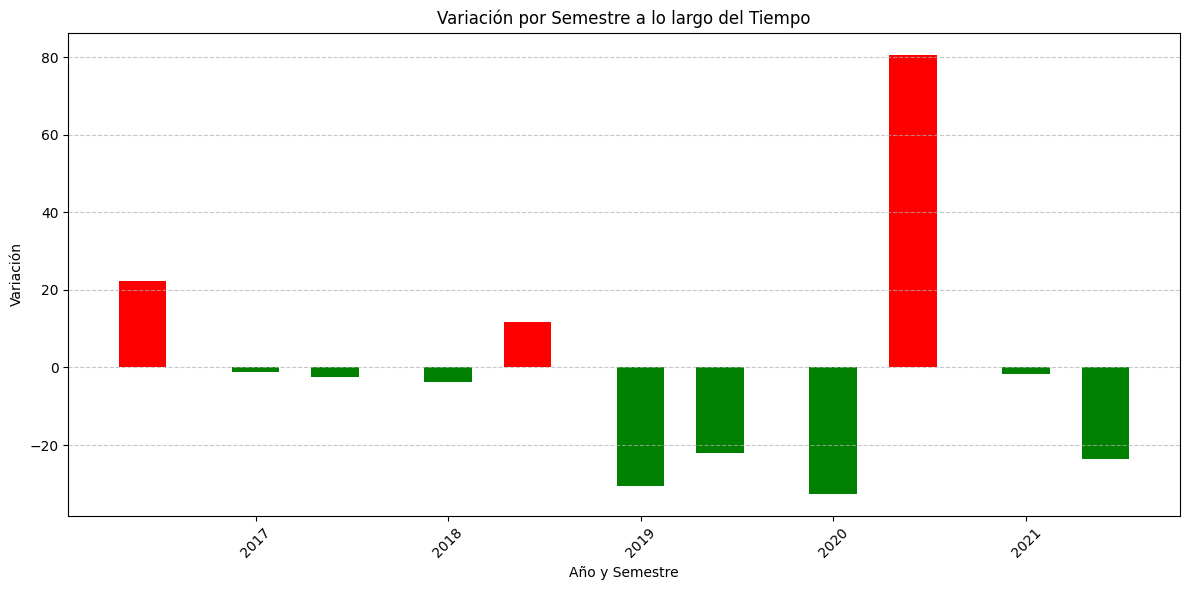

In [13]:
df_kpi_1['SEMESTRE'] = [6 if a == 2 else a for a in df_kpi_1['SEMESTRE']]
df_kpi_1['AÑO'] = pd.to_numeric(df_kpi_1['AÑO'], errors='coerce')
df_kpi_1['SEMESTRE'] = pd.to_numeric(df_kpi_1['SEMESTRE'], errors='coerce')
df_kpi_1 = df_kpi_1.dropna(subset=['AÑO', 'SEMESTRE'])
df_kpi_1['AÑO'] = df_kpi_1['AÑO'].astype(int)
df_kpi_1['SEMESTRE'] = df_kpi_1['SEMESTRE'].astype(int)
df_kpi_1['FECHA'] = df_kpi_1['AÑO'].astype(str) + '-' + df_kpi_1['SEMESTRE'].astype(str) + '-01'
df_kpi_1['FECHA'] = pd.to_datetime(df_kpi_1['FECHA'], format='%Y-%m-%d')

plt.figure(figsize=(12, 6))
colores = ['red' if valor >= 0 else 'green' for valor in df_kpi_1['VARIACION']]
plt.bar(df_kpi_1['FECHA'], df_kpi_1['VARIACION'], color=colores, width=90)
plt.xlabel('Año y Semestre')
plt.ylabel('Variación')
plt.title('Variación por Semestre a lo largo del Tiempo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




_________________________

In [14]:
# Se construye la ruta completa al archivo CSV desde la ubicación del notebook
siniestros = os.path.join('..', 'CSV', 'kpi_1.csv')

# Se guarda el DataFrame en el archivo CSV
df_kpi_1.to_csv(siniestros, index=False, encoding='utf-8')

# Se emite un mensaje que se guardó
print(f'Se guardó el archivo {siniestros}')

Se guardó el archivo ..\CSV\kpi_1.csv


________________________________

## KPI II

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal.
Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

Se filtra por victima = MOTO


In [15]:
df_kpi_2 = df_siniestros[df_siniestros['VICTIMA'] == 'MOTO']


Agrupación por año y cantidad de víctimas

In [16]:
df_kpi_2 = df_kpi_2.groupby(['AÑO']).size().reset_index(name='ACTUAL')

Se creala columna AÑO_ANTERIOR que obtiene el dato de cantidad de HOMICIDIOS del año anterior

In [17]:
df_kpi_2['ANTERIOR'] = df_kpi_2['ACTUAL'].shift(periods=1, fill_value=0)

Creación de columna Variación Porcentual (%) y asignación de valor = ((Nuevo Valor - Valor Antiguo) / Valor Antiguo) * 100

(Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

In [18]:
df_kpi_2['VARIACION'] = (df_kpi_2['ANTERIOR']- df_kpi_2['ACTUAL']) / df_kpi_2['ANTERIOR'] * 100

In [19]:
df_kpi_2

,AÑO,ACTUAL,ANTERIOR,VARIACION
0,2016,65,0,-inf
1,2017,56,65,13.846154
2,2018,57,56,-1.785714
3,2019,49,57,14.035088
4,2020,28,49,42.857143
5,2021,46,28,-64.285714


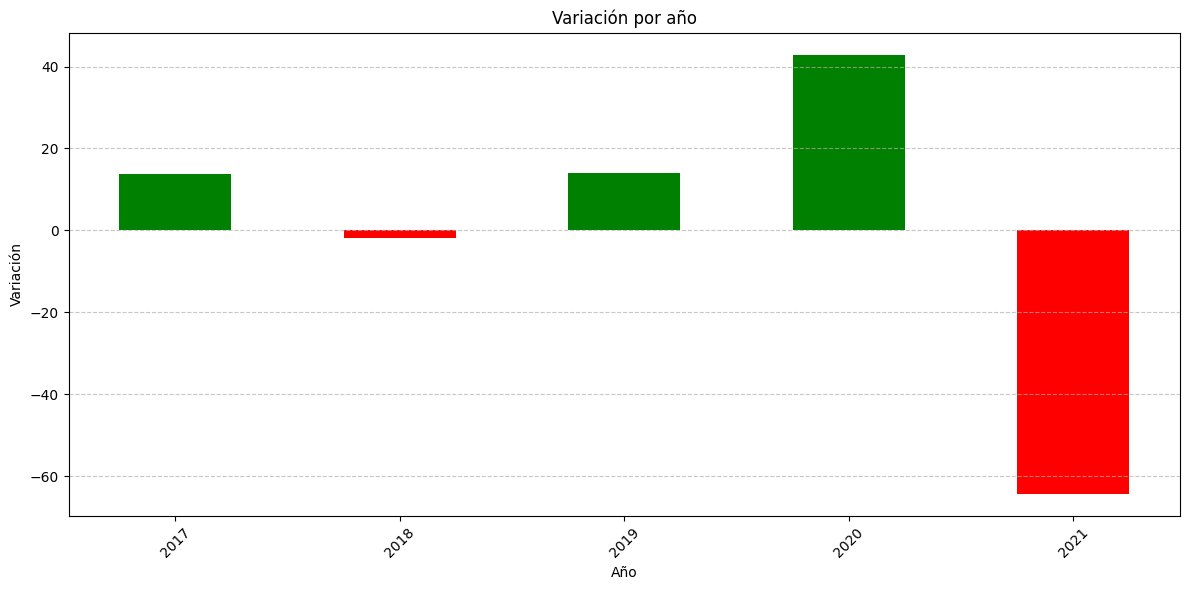

In [20]:
# Suponiendo que ya tienes el DataFrame df_kpi_2 con las columnas 'AÑO' y 'VARIACION'

plt.figure(figsize=(12, 6))

# Asigna colores
colores = ['green' if valor >= 0 else 'red' for valor in df_kpi_2['VARIACION']]

# Gráfico de barras con colores
plt.bar(df_kpi_2['AÑO'], df_kpi_2['VARIACION'], color=colores, width=0.5)

plt.xlabel('Año')
plt.ylabel('Variación')
plt.title('Variación por año')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Al analizar los resultados:

- En 2016, no hay datos del año anterior, por lo que la variación no se puede calcular.
- En <u><b>2017</u></b>, la variación es positiva (17.46%), lo que indica una <u><b>reducción</u></b>.
- En <u><b>2018</u></b>, la variación es negativa (-9.62%), indicando un <u><b>aumento</u></b>.
- En<u><b> 2019</u></b>, la variación es positiva (14.04%), nuevamente indicando una <u><b>reducción</u></b>.
- En <u><b>2020</u></b>, la variación es significativamente positiva (44.90%), mostrando una <u><b>disminución sustancial</u></b>.
- En <u><b>2021</u></b>, la variación es negativa (-66.67%), lo que sugiere un <u><b>aumento considerable</u></b>.

Aunque se observa una mejora en varios años, la variación negativa en <u><b>2021</u></b> indica un aumento significativo en la cantidad de accidentes mortales de motociclistas en comparación con el año anterior, <u><b>incumpliendo el objetivo del KPI2</u></b>. 

_________________________

In [21]:
# Se construye la ruta completa al archivo CSV desde la ubicación del notebook
siniestros = os.path.join('..', 'CSV', 'kpi_2.csv')

# Se guarda el DataFrame en el archivo CSV
df_kpi_2.to_csv(siniestros, index=False, encoding='utf-8')

# Se emite un mensaje que se guardó
print(f'Se guardó el archivo {siniestros}')

Se guardó el archivo ..\CSV\kpi_2.csv


________________

## KPI III

### KPI 3: Reducir en un 2% la cantidad de accidentes mortales de peatones en el último año respecto al año anterior, en CABA, en comparación con la tasa de homicidios en siniestros viales del año anterior.

In [22]:
df_kpi_3 = df_siniestros[df_siniestros['VICTIMA'] == 'PEATON']

Agrupación por año y cantidad de víctimas

In [23]:
df_kpi_3 = df_kpi_3.groupby(['AÑO'])["CANT_VICTIMAS"].sum().reset_index(name='ACTUAL')


In [24]:
df_kpi_3['ANTERIOR'] = df_kpi_3['ACTUAL'].shift(periods=1, fill_value=0)

In [25]:
df_kpi_3['ACTUAL'] = (df_kpi_3['ACTUAL']/promedio_total) * 100000
df_kpi_3['ANTERIOR'] = (df_kpi_3['ANTERIOR']/promedio_total) * 100000

In [26]:
df_kpi_3['VARIACION'] = (df_kpi_3['ACTUAL'] - df_kpi_3['ANTERIOR']) / df_kpi_3['ANTERIOR'] * 100
df_kpi_3

,AÑO,ACTUAL,ANTERIOR,VARIACION
0,2016,1.566091,0.000000,inf
1,2017,1.598718,1.566091,2.083333
2,2018,2.218629,1.598718,38.775510
3,2019,1.207195,2.218629,-45.588235
4,2020,1.109314,1.207195,-8.108108
5,2021,1.076688,1.109314,-2.941176


La variación negativa en la cantidad de accidentes mortales de peatones en los años 2019, 2020 y 2021 indica que ha habido una disminución en comparación con el año anterior. Sin embargo, para determinar si se cumple o no el KPI3, es necesario comparar esta variación con el objetivo del KPI, que es reducir en un 2% la cantidad de accidentes mortales de peatones en el último año respecto al año anterior.

Observando la variación en cada año:

- En 2017, la variación es positiva (2.08%), indicando un aumento en la cantidad de accidentes mortales de peatones. No cumple con el objetivo.
- En 2018, la variación es muy positiva (38.78%), mostrando un aumento significativo. No cumple con el objetivo.
- En 2019, la variación es negativa (-45.59%), indicando una disminución significativa. Cumple con el objetivo.
- En 2020, la variación es negativa (-8.11%), señalando otra disminución. Cumple con el objetivo.
- En 2021, la variación es negativa (-2.94%), indicando una disminución. Cumple con el objetivo.

En conclusión, el KPI3 <u><b>se cumple en los años 2019, 2020 y 2021</u></b>, ya que en estos años se logró la reducción del 2% en la cantidad de accidentes mortales de peatones en comparación con el año anterior.






____________________________

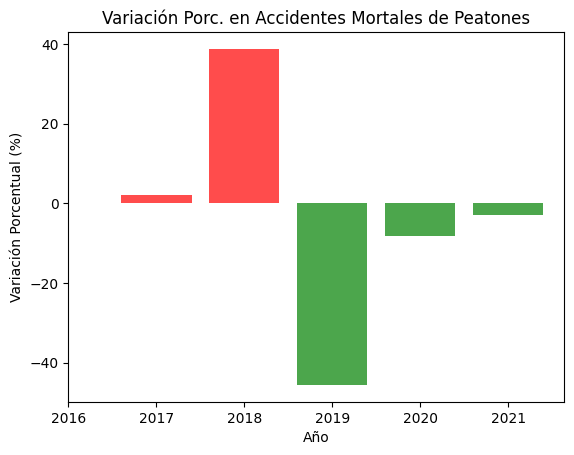

In [27]:
import matplotlib.pyplot as plt

# Datos
años = df_kpi_3['AÑO']
variacion =df_kpi_3['VARIACION']

# Colores para barras positivas (rojo) y negativas (verde)
colores = ['red' if v > 0 else 'green' for v in variacion]

# Gráfico de barras con colores
plt.bar(años, variacion, color=colores, alpha=0.7)
plt.xlabel('Año')
plt.ylabel('Variación Porcentual (%)')
plt.title('Variación Porc. en Accidentes Mortales de Peatones')
plt.xticks(años)  # Asegura que todos los años estén etiquetados
plt.show()


_____________________

In [28]:
# Se construye la ruta completa al archivo CSV desde la ubicación del notebook
siniestros = os.path.join('..', 'CSV', 'kpi_3_t.csv')

# Se guarda el DataFrame en el archivo CSV
df_kpi_3.to_csv(siniestros, index=False, encoding='utf-8')

# Se emite un mensaje que se guardó
print(f'Se guardó el archivo {siniestros}')

Se guardó el archivo ..\CSV\kpi_3_t.csv
